## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [2]:
# Импортируйте все необходимые библиотеки и модули которые вам необходимы
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('../descriptive_stats/clients.csv')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

(195, 25)

Всего в таблице 195 объектов и 24 признака для них

In [5]:
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


Проверим наши данные на наличие дубликатов по ID? если они есть - удалим эти записи, чтобы у нас был очищенный набор данных без дубликатов по ID.

In [7]:
sessions = data['ID'].value_counts(ascending=False)
duplicate = sessions[sessions > 1].count()
print(f"У нас имеются {duplicate} записей, которые не уникальны в нашей выборке.")

У нас имеются 1 записей, которые не уникальны в нашей выборке.


In [8]:
data_to_drop = sessions[sessions > 1].index
# Проверяем вхождения, знак ~ логическо нет
data = data[~data['ID'].isin(data_to_drop)]
print(f"Количество записей без дубликтов {data.shape[0]}")

Количество записей без дубликтов 193


Столбец 'Price' содержит информацию и стоимости квартир и имеет тип 'object', для удобства я его преобразую в тип 'float' и поделю на 1000 (чтобы сумма отображалась в тысячах). Так же для удобства площадь переведу в метры квадратные.

In [10]:
data['Price'] = data['Price'].replace({"\\$": "", ",": "", " ": ""}, regex=True).astype(float)/1000
data['Area (m.)'] = (data['Area (ft.)']*0.092903).round(2)

data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Area (m.)
0,1030,1,2005,11,Apartment,30,743.09,246.17268,Sold,C0028,...,6.0,21.0,F,USA,California,Home,5,No,Website,69.04
1,1029,1,2005,10,Apartment,29,756.21,246.33190,Sold,C0027,...,2.0,24.0,F,USA,California,Home,5,No,Website,70.25
2,2002,2,2007,7,Apartment,2,587.28,209.28091,Sold,C0112,...,12.0,27.0,M,USA,California,Home,1,Yes,Client,54.56
3,2031,2,2007,12,Apartment,31,1604.75,452.66701,Sold,C0160,...,12.0,27.0,M,USA,California,Investment,3,Yes,Website,149.09
4,1049,1,2004,11,Apartment,49,1375.45,467.08331,Sold,C0014,...,5.0,15.0,F,USA,California,Home,4,No,Agency,127.78


В некоторых столбцах отсутствуют значения, посмотрю на эти строки

In [12]:
data[data.isnull().any(axis=1)].head(50)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Area (m.)
41,1032,1,2005,1,Apartment,32,782.25,215.41028,Sold,C0015,...,10.0,30.0,F,Belgium,NaN,Home,2,No,Agency,72.67
58,2025,2,2007,2,Apartment,25,927.83,315.73315,Sold,C0070,...,6.0,13.0,F,Russia,NaN,Home,1,No,Agency,86.20
64,2005,2,2006,9,Apartment,5,785.48,257.18348,Sold,C0047,...,1.0,11.0,F,Denmark,NaN,Investment,1,No,Agency,72.97
76,3049,3,2007,4,Apartment,49,1283.45,338.18118,Sold,C0084,...,5.0,12.0,M,Mexico,NaN,Home,3,No,Agency,119.24
114,2003,2,2006,12,Apartment,3,927.08,289.72799,Sold,C0063,...,12.0,2.0,M,Russia,NaN,Investment,3,No,Agency,86.13
139,3050,3,2006,11,Apartment,50,977.87,248.27431,Sold,C0059,...,6.0,22.0,F,Russia,NaN,Home,3,Yes,Agency,90.85
146,2019,2,2007,3,Apartment,19,649.80,177.55506,Sold,C0079,...,5.0,24.0,M,Canada,NaN,Investment,5,No,Website,60.37
147,2021,2,2007,4,Apartment,21,785.48,217.74848,Sold,C0079,...,5.0,24.0,M,Canada,NaN,Investment,5,No,Website,72.97
148,2027,2,2007,4,Apartment,27,785.48,247.73944,Sold,C0079,...,5.0,24.0,M,Canada,NaN,Investment,5,No,Website,72.97
149,2052,2,2007,3,Apartment,52,1615.29,484.45803,Sold,C0079,...,5.0,24.0,M,Canada,NaN,Investment,5,No,Website,150.07


Это отсутствие значений в столбце с названием штата 'State' не является ошибкой или выбросом, а скорее отражает особенности административного деления в разных странах.
Отсутствие значений в столбцах, описывающих сущность клиента с типом 'Entity' = 'Firm' (таких как 'Age at time of purchase', 'Age Interval', 'Y', 'M', 'D', 'Gender') также не является выбросами, а скорее отражает специфику данных, связанных с покупками, совершенными организациями. Это важно учитывать при анализе, чтобы избежать неправильных выводов.

<Axes: title={'center': 'Распределение Entity'}, ylabel='count'>

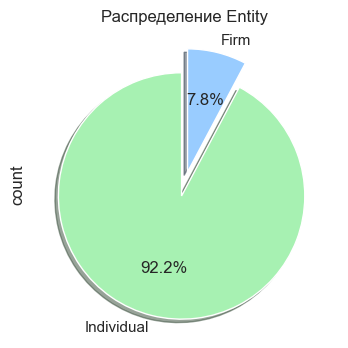

In [14]:
Entity_distribution = data['Entity'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
explode = [0.1] * len(Entity_distribution)
colors = ['#A7F1B2', '#99CCFF']
plt.title('Распределение Entity')
plt.ylabel('')
Entity_distribution.plot(kind='pie', 
                         autopct='%1.1f%%', 
                         startangle=90, 
                         colors=colors, 
                         explode=explode, 
                         shadow=True)

При анализе я разделю клиентов на группы (например, физические лица и фирмы) и для анализа портрета целевого клиента компании буду использовать датасет только по физическим лицам (сущность клиента с типом 'Entity' = 'Individual').

In [16]:
data.rename(columns={'Age Interval ': 'Age Interval'}, inplace=True) #в столбце 'Age Interval ' уберу пробел в названии
data_f = data[data['Entity'] == 'Firm']
data_i = data[data['Entity'] == 'Individual']

In [17]:
data_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 177
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       178 non-null    int64  
 1   Building                 178 non-null    int64  
 2   Year of sale             178 non-null    int64  
 3   Month of sale            178 non-null    int64  
 4   Type of property         178 non-null    object 
 5   Property number          178 non-null    int64  
 6   Area (ft.)               178 non-null    float64
 7   Price                    178 non-null    float64
 8   Status                   178 non-null    object 
 9   Customer ID              178 non-null    object 
 10  Entity                   178 non-null    object 
 11  Name                     178 non-null    object 
 12  Surname                  178 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             178 no

Для информации о портрете целевого клиента среди физических лиц, посмотрим на распеределение их по странам ('Country')

In [19]:
data_i['Country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada'], dtype=object)

У нас получилось 2 значения страны ('Country'), видимо в некоторых записях с 'USA' есть лишний пробел, уберем его

In [21]:
data_i.loc[:, 'Country'] = data_i['Country'].str.strip()
data_i['Country'].unique()

array(['USA', 'UK', 'Belgium', 'Russia', 'Denmark', 'Germany', 'Mexico',
       'Canada'], dtype=object)

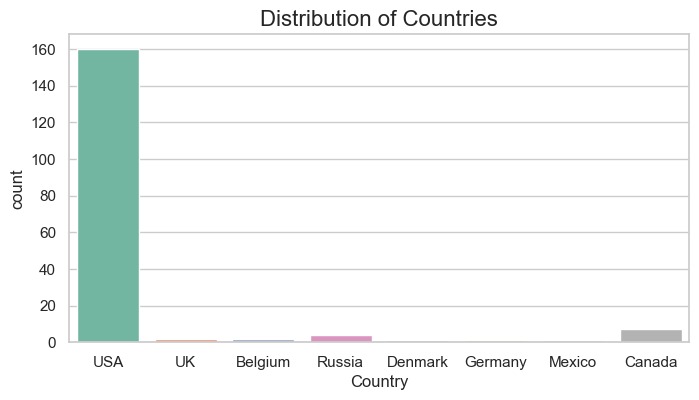

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_i, x='Country', hue='Country', palette='Set2', legend=False)
plt.title('Distribution of Countries', fontsize=16)

sns.set_style("whitegrid")

plt.show()

Очевидно, что под портрет нашего целевого клиента попадает клиент, у которого в столбце 'Country' стоит значение 'USA'

Далее можно посмотреть на распределение клиентов, у которых в столбце 'Country' стоит значение 'USA' по штатам ('State')

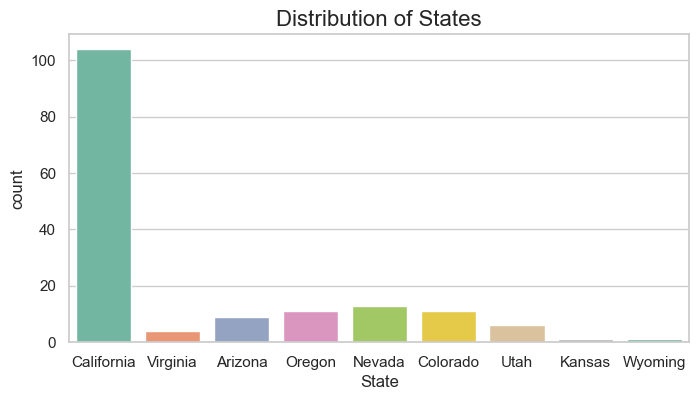

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_i[data_i['Country'] == 'USA'], x='State', hue='State', palette='Set2', legend=False)
plt.title('Distribution of States', fontsize=16)

sns.set_style("whitegrid")

plt.show()

и можем дополнить портрет целевого клиента:  
'Country' = 'USA'  
'State' = 'California''

In [27]:
target_client = data_i[(data_i['Country'] == 'USA') & (data_i['State'] == 'California')]
target_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 176
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       104 non-null    int64  
 1   Building                 104 non-null    int64  
 2   Year of sale             104 non-null    int64  
 3   Month of sale            104 non-null    int64  
 4   Type of property         104 non-null    object 
 5   Property number          104 non-null    int64  
 6   Area (ft.)               104 non-null    float64
 7   Price                    104 non-null    float64
 8   Status                   104 non-null    object 
 9   Customer ID              104 non-null    object 
 10  Entity                   104 non-null    object 
 11  Name                     104 non-null    object 
 12  Surname                  104 non-null    object 
 13  Age at time of purchase  104 non-null    float64
 14  Age Interval             104 no

Построим процентное соотношение мужчин и женщин среди клиентов. Это поможет понять, какой пол преобладает среди покупателей.

In [29]:
print(target_client['Gender'].describe())

count     104
unique      2
top         M
freq       58
Name: Gender, dtype: object


<Axes: title={'center': 'Distribution by gender'}, ylabel='count'>

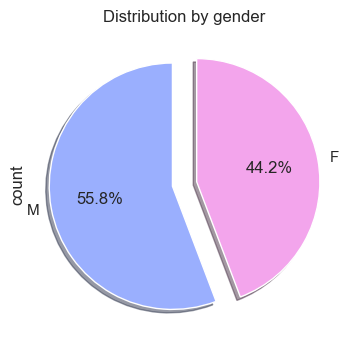

In [30]:
Gender_distribution = target_client['Gender'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
explode = [0.1] * len(Gender_distribution)
colors = ['#9AAFFE', '#F3A5EC']
plt.title('Distribution by gender')
Gender_distribution.plot(kind='pie', 
                         autopct='%1.1f%%', 
                         startangle=90, 
                         colors=colors, 
                         explode=explode, 
                         shadow=True)

Думаю что пока я не готова сказать что целевой клиент мужчина или женщина, да, мужчин больше, но это не значит, что заинтерисованность женщин меньше. 
Построим распределение клиентов по возрастным группам, чтобы понять, какие возрастные группы наиболее активны среди наших клиентов.

In [32]:
print(target_client['Age Interval'].describe())

count       104
unique        6
top       36-45
freq         33
Name: Age Interval, dtype: object


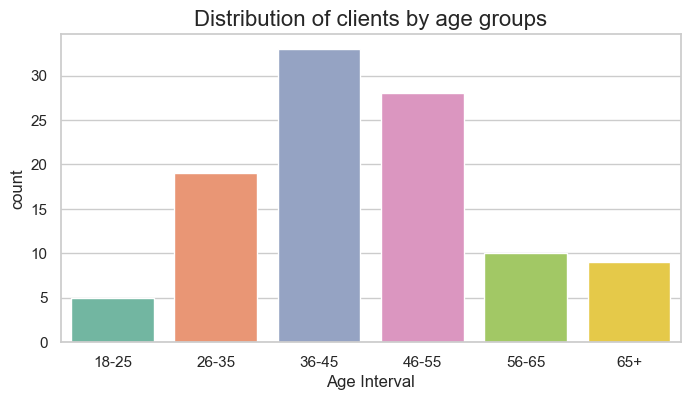

In [33]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_i[(data_i['Country'] == 'USA') & (data_i['State'] == 'California')], x='Age Interval', hue='Age Interval', palette='Set2', legend=False)
plt.title('Distribution of clients by age groups', fontsize=16)

sns.set_style("whitegrid")

plt.show()

Если опираться на выбранные диапазоны возрастов ('Age Interval'), то можно сказать, что наш целевой клиент принадлежит диапазону возварта [36;45]. Попробуем посмотреть на графике Box Plot как распределены клиенты по возрасту и полу.

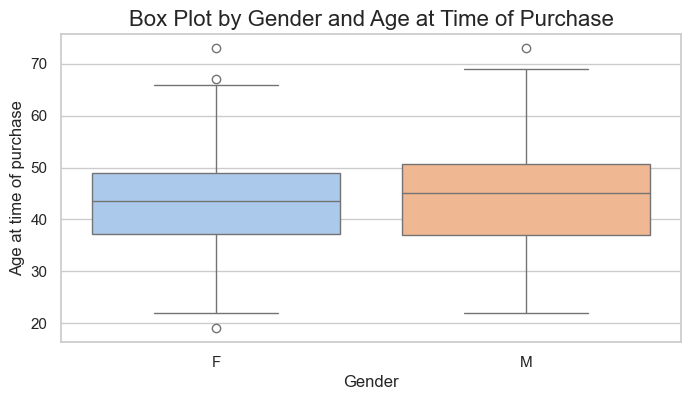

In [35]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=target_client, x='Gender', y='Age at time of purchase', hue='Gender', palette='pastel', legend=False)

plt.title('Box Plot by Gender and Age at Time of Purchase', fontsize=16)
sns.set_style("whitegrid")

plt.show()

In [36]:
print(target_client['Age at time of purchase'].describe())

count    104.000000
mean      44.884615
std       11.933723
min       19.000000
25%       37.000000
50%       44.500000
75%       50.250000
max       73.000000
Name: Age at time of purchase, dtype: float64


На самом деле даже распределение по возрасту у мужчин и женщин не сильно отличается, медианное значение (у мужчин 45 у женщин 43.5) очень близки, я думаю я могу принять как целевого клиента - клиента, возраст которого находится между первым и третьим квантилем.
можем дополнить портрет целевого клиента:  
'Country' = 'USA'  
'State' = 'California'  
37<='Age at time of purchase'<51


In [38]:
target_client = data_i[(data_i['Country'] == 'USA') & (data_i['State'] == 'California') & (data_i['Age at time of purchase'] >= 37) & 
    (data_i['Age at time of purchase'] < 51)]
target_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 43 to 145
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       54 non-null     int64  
 1   Building                 54 non-null     int64  
 2   Year of sale             54 non-null     int64  
 3   Month of sale            54 non-null     int64  
 4   Type of property         54 non-null     object 
 5   Property number          54 non-null     int64  
 6   Area (ft.)               54 non-null     float64
 7   Price                    54 non-null     float64
 8   Status                   54 non-null     object 
 9   Customer ID              54 non-null     object 
 10  Entity                   54 non-null     object 
 11  Name                     54 non-null     object 
 12  Surname                  54 non-null     object 
 13  Age at time of purchase  54 non-null     float64
 14  Age Interval             54 non

Постоим круговую диаграмму, для определения наиболее популярного типа недвижимости нашего целевого клиента

<Axes: title={'center': 'Distribution by property type'}, ylabel='count'>

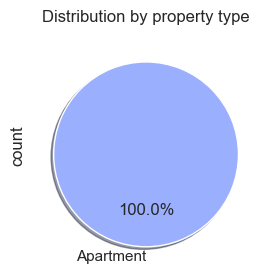

In [40]:
Type_distribution = target_client['Type of property'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
explode = [0.1] * len(Type_distribution)
colors = ['#9AAFFE', '#F3A5EC']
plt.title('Distribution by property type')

Type_distribution.plot(kind='pie', 
                         autopct='%1.1f%%', 
                         startangle=90, 
                         colors=colors, 
                         explode=explode, 
                         shadow=True)

Очевидно, что наш целевой клиент предпочитает тип недвижимости 'Apartment'.  
Постоим круговую диаграмму, для определения наиболее популярной цели недвижимости нашего целевого клиента

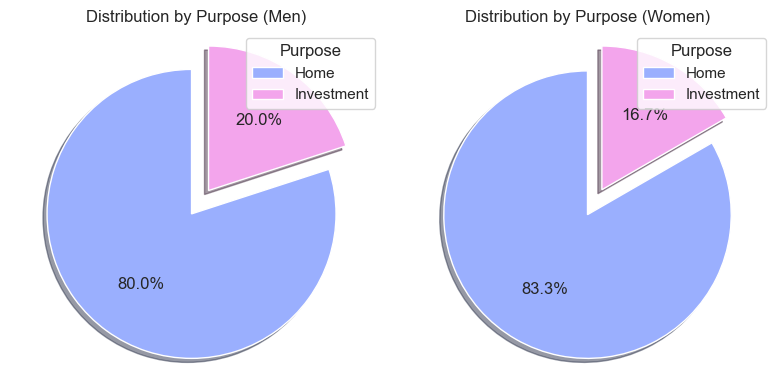

In [42]:
purpose_distribution_men = target_client[target_client['Gender'] == 'M']['Purpose'].value_counts()
purpose_distribution_women = target_client[target_client['Gender'] == 'F']['Purpose'].value_counts()

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Круговая диаграмма для мужчин
axes[0].pie(purpose_distribution_men, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['#9AAFFE', '#F3A5EC'], 
            explode=[0.1] * len(purpose_distribution_men), 
            shadow=True)
axes[0].set_title('Distribution by Purpose (Men)')
axes[0].axis('equal') 
axes[0].legend(purpose_distribution_men.index, title="Purpose", loc="upper right")

# Круговая диаграмма для женщин
axes[1].pie(purpose_distribution_women, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['#9AAFFE', '#F3A5EC'], 
            explode=[0.1] * len(purpose_distribution_women), 
            shadow=True)
axes[1].set_title('Distribution by Purpose (Women)')
axes[1].axis('equal')
axes[1].legend(purpose_distribution_women.index, title="Purpose", loc="upper right")

plt.tight_layout()
plt.show()

Думаю можем дополнить портрет целевого клиента:  
'Country' = 'USA'  
'State' = 'California'  
37<='Age at time of purchase'<51  
'Type of property' = 'Apartment'  
'Purpose' = 'Home'

In [44]:
target_client = data_i[(data_i['Country'] == 'USA') & (data_i['State'] == 'California') & (data_i['Age at time of purchase'] >= 37) & 
    (data_i['Age at time of purchase'] < 51) & (data_i['Type of property'] == 'Apartment') & (data_i['Purpose'] == 'Home')]
target_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 43 to 145
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       44 non-null     int64  
 1   Building                 44 non-null     int64  
 2   Year of sale             44 non-null     int64  
 3   Month of sale            44 non-null     int64  
 4   Type of property         44 non-null     object 
 5   Property number          44 non-null     int64  
 6   Area (ft.)               44 non-null     float64
 7   Price                    44 non-null     float64
 8   Status                   44 non-null     object 
 9   Customer ID              44 non-null     object 
 10  Entity                   44 non-null     object 
 11  Name                     44 non-null     object 
 12  Surname                  44 non-null     object 
 13  Age at time of purchase  44 non-null     float64
 14  Age Interval             44 non

Построим график, для определения средней площади приобретаемой недвижимости.

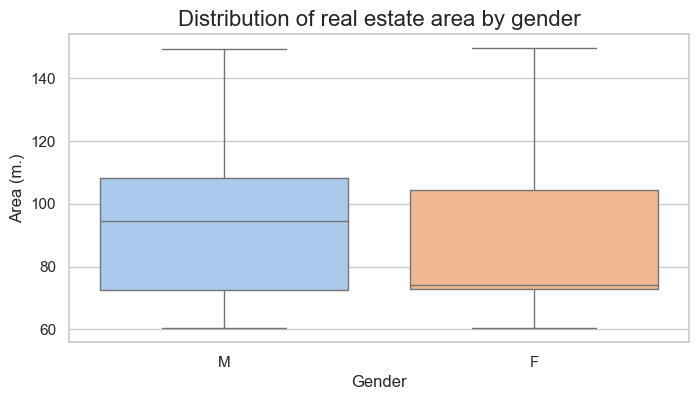

In [46]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=target_client, x='Gender', y='Area (m.)', hue='Gender', palette='pastel', legend=False)

plt.title('Distribution of real estate area by gender', fontsize=16)
sns.set_style("whitegrid")

plt.show()

Медианное значение площади, приобретаемой недвижимости нашего целевого клиента в размере пола ('Gender') отличается, но т.к. я хочу взять значение площади, которое находится между первым и третьим квантилем, то я думаю могу взять эти значения в целом по выборке целевых клиентов.

In [48]:
print(target_client['Area (m.)'].describe())

count     44.000000
mean      93.526818
std       25.573338
min       60.360000
25%       72.895000
50%       86.200000
75%      106.202500
max      149.470000
Name: Area (m.), dtype: float64


дополним портрет целевого клиента:
'Country' = 'USA'  
'State' = 'California'  
37<= 'Age at time of purchase' <51  
'Type of property' = 'Apartment'  
'Purpose' = 'Home'  
72<= 'Area (m.)' <107

In [50]:
target_client = data_i[(data_i['Country'] == 'USA') & (data_i['State'] == 'California') & (data_i['Age at time of purchase'] >= 37) & 
    (data_i['Age at time of purchase'] < 51) & (data_i['Type of property'] == 'Apartment') & (data_i['Purpose'] == 'Home')
    & (data_i['Area (m.)'] >= 72) & (data_i['Area (m.)'] < 107)]
target_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 45 to 111
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26 non-null     int64  
 1   Building                 26 non-null     int64  
 2   Year of sale             26 non-null     int64  
 3   Month of sale            26 non-null     int64  
 4   Type of property         26 non-null     object 
 5   Property number          26 non-null     int64  
 6   Area (ft.)               26 non-null     float64
 7   Price                    26 non-null     float64
 8   Status                   26 non-null     object 
 9   Customer ID              26 non-null     object 
 10  Entity                   26 non-null     object 
 11  Name                     26 non-null     object 
 12  Surname                  26 non-null     object 
 13  Age at time of purchase  26 non-null     float64
 14  Age Interval             26 non

Думаю, что стоимость недвижимости коррелирует с площадью, проверим:

In [52]:
data_i[['Price', 'Area (m.)']].corr()

,Price,Area (m.)
Price,1.00000,0.93888
Area (m.),0.93888,1.00000


Действительно, площадь недвижимости сильно коррелирует с ее стоимостью, а т.к. в портрет целевого клиента я включила площадь, то стоимость не буду учитывать.

По результатам анализа, я определила целевого клиента компании:  
это мужчина или женщина, возраст [37;51), из США штат Калифорния, который хочет купить апартаменты для жилья с площадью [72;107] метров квадратных

('Country' = 'USA'  
'State' = 'California'  
37<= 'Age at time of purchase' <51  
'Type of property' = 'Apartment'  
'Purpose' = 'Home'  
72<= 'Area (m.)' <107)

Далее посмотрим на распределение наших целевых клиентов по источнику привлечения

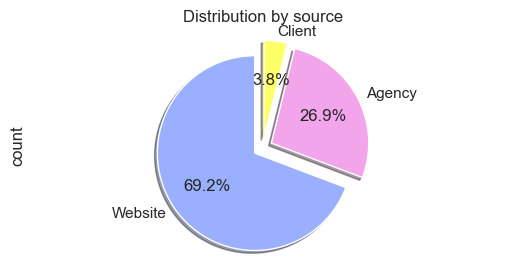

In [56]:
Source_distribution = target_client['Source'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
explode = [0.1] * len(Source_distribution)
colors = ['#9AAFFE', '#F3A5EC', '#FFFF66']
plt.title('Distribution by source')

Source_distribution.plot(kind='pie', 
                         autopct='%1.1f%%', 
                         startangle=90, 
                         colors=colors, 
                         explode=explode, 
                         shadow=True)
plt.axis('equal') 
plt.show()

Возможно при определении характеристик нашего целевого клиента и посмотрев на распределение по типу привлечения можно предложить компании ряд действий для увеличения продаж.
К примеру запустить активную рекламу на сайте, ориентированную на эту целевую группу, создание контента, который будет интересен целевой аудитории (это могут быть статьи о жизни в Калифорнии, преимуществах покупки апартаментов, советы по выбору жилья и т.д.)

In [58]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 178 to 194
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       15 non-null     int64  
 1   Building                 15 non-null     int64  
 2   Year of sale             15 non-null     int64  
 3   Month of sale            15 non-null     int64  
 4   Type of property         15 non-null     object 
 5   Property number          15 non-null     int64  
 6   Area (ft.)               15 non-null     float64
 7   Price                    15 non-null     float64
 8   Status                   15 non-null     object 
 9   Customer ID              15 non-null     object 
 10  Entity                   15 non-null     object 
 11  Name                     15 non-null     object 
 12  Surname                  15 non-null     object 
 13  Age at time of purchase  0 non-null      float64
 14  Age Interval             0 non

Для составления портрета целевого клиента компании с типом 'Entity' == 'Firm' мне кажется данных не достаточно, надо предложить компании либо накопить еще данных, либо выбрать больший период.

Возможно, я пошла совсем не в ту степь и надо было составлять портрет совсем по другом, крутила множество вариантов, но остановилась на этом. Понять и простить)